# BIOS 512 Final Project

We will be looking at Malaria data originally from https://ourworldindata.org/malaria.  The data contains information about malaria incidence and deaths by country and age group from the years 2000, 2005, 2010, and 2015.  For this project, we will narrow the dataset down to an interesting subset of the data, focusing on the number of deaths due to malaria.  We will also use the `countrycode` package to add a continent variable in order to make the data more manageable and easier to group.

In [2]:
library('tidyverse')
library('countrycode')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
malaria_deaths_age <- read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv',
    col_types = cols()) |>
    rename(Entity = entity, Code = code, Year = year) |>
    select(-'...1') |>
    mutate(deaths = round(deaths, digits = 4))

malaria_deaths_age |> head()

malaria_deaths <- read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv',
    col_types = cols()) |>
    rename(deaths_per_100000 = 'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)') |>
    mutate(deaths_per_100000 = round(deaths_per_100000, digits = 4))

malaria_deaths |> head()

malaria_inc <- read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv',
    col_types = cols()) |>
    rename(incidence_per_1000 = 'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)') |>
    mutate(incidence_per_1000 = round(incidence_per_1000, digits = 4))

malaria_inc |> head()

New names:
• `` -> `...1`


Entity,Code,Year,age_group,deaths
<chr>,<chr>,<dbl>,<chr>,<dbl>
Afghanistan,AFG,1990,Under 5,184.6064
Afghanistan,AFG,1991,Under 5,191.6582
Afghanistan,AFG,1992,Under 5,197.1402
Afghanistan,AFG,1993,Under 5,207.3578
Afghanistan,AFG,1994,Under 5,226.2094
Afghanistan,AFG,1995,Under 5,236.3280


Entity,Code,Year,deaths_per_100000
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1990,6.8029
Afghanistan,AFG,1991,6.9735
Afghanistan,AFG,1992,6.9899
Afghanistan,AFG,1993,7.0890
Afghanistan,AFG,1994,7.3925
Afghanistan,AFG,1995,7.4055


Entity,Code,Year,incidence_per_1000
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,2000,107.1000
Afghanistan,AFG,2005,46.5000
Afghanistan,AFG,2010,23.9000
Afghanistan,AFG,2015,23.6000
Algeria,DZA,2000,0.0377
Algeria,DZA,2005,0.0020


In [4]:
list <- list(malaria_deaths_age, malaria_deaths, malaria_inc)

malaria <- list |> 
    reduce(inner_join, by = c('Entity', 'Code', 'Year')) |>
    mutate(Continent = countrycode(Entity, 'country.name', 'continent')) |>
    filter(!is.na(Continent)) |>
    rename(Country = Entity)

malaria |> head()

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Continent = countrycode(Entity, "country.name", "continent")`.
Caused by warning:
! Some values were not matched unambiguously: South Asia, Sub-Saharan Africa, Timor, World”


Country,Code,Year,age_group,deaths,deaths_per_100000,incidence_per_1000,Continent
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,AFG,2000,Under 5,278.3776,7.9399,107.1000,Asia
Afghanistan,AFG,2005,Under 5,459.1258,8.5510,46.5000,Asia
Afghanistan,AFG,2010,Under 5,272.3081,7.2712,23.9000,Asia
Afghanistan,AFG,2015,Under 5,394.0685,7.1923,23.6000,Asia
Algeria,DZA,2000,Under 5,0.5656,0.0265,0.0377,Africa
Algeria,DZA,2005,Under 5,0.5181,0.0252,0.0020,Africa


In [6]:
malaria_allages <- malaria |>
    group_by(Country, Year) |>
    mutate(deaths_allages = sum(deaths)) |>
    mutate(deaths_per_100000_allages = sum(deaths_per_100000)) |>
    mutate(incidence_per_1000_allages = sum(incidence_per_1000)) |>
    select(-age_group, -deaths, -deaths_per_100000, -incidence_per_1000) |>
    distinct()

malaria_allages |> head()

Country,Code,Year,Continent,deaths_allages,deaths_per_100000_allages,incidence_per_1000_allages
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2000,Asia,1296.9225,39.6995,535.5000
Afghanistan,AFG,2005,Asia,1836.2234,42.7550,232.5000
Afghanistan,AFG,2010,Asia,1645.0182,36.3560,119.5000
Afghanistan,AFG,2015,Asia,2079.2297,35.9615,118.0000
Algeria,DZA,2000,Africa,7.0959,0.1325,0.1885
Algeria,DZA,2005,Africa,7.6209,0.1260,0.0100


First, we will look at total malaria incidence per 1,000 people across all age groups vs. total deaths per 100,000 people across all age groups for each of the years 2000, 2005, 2010, and 2015.

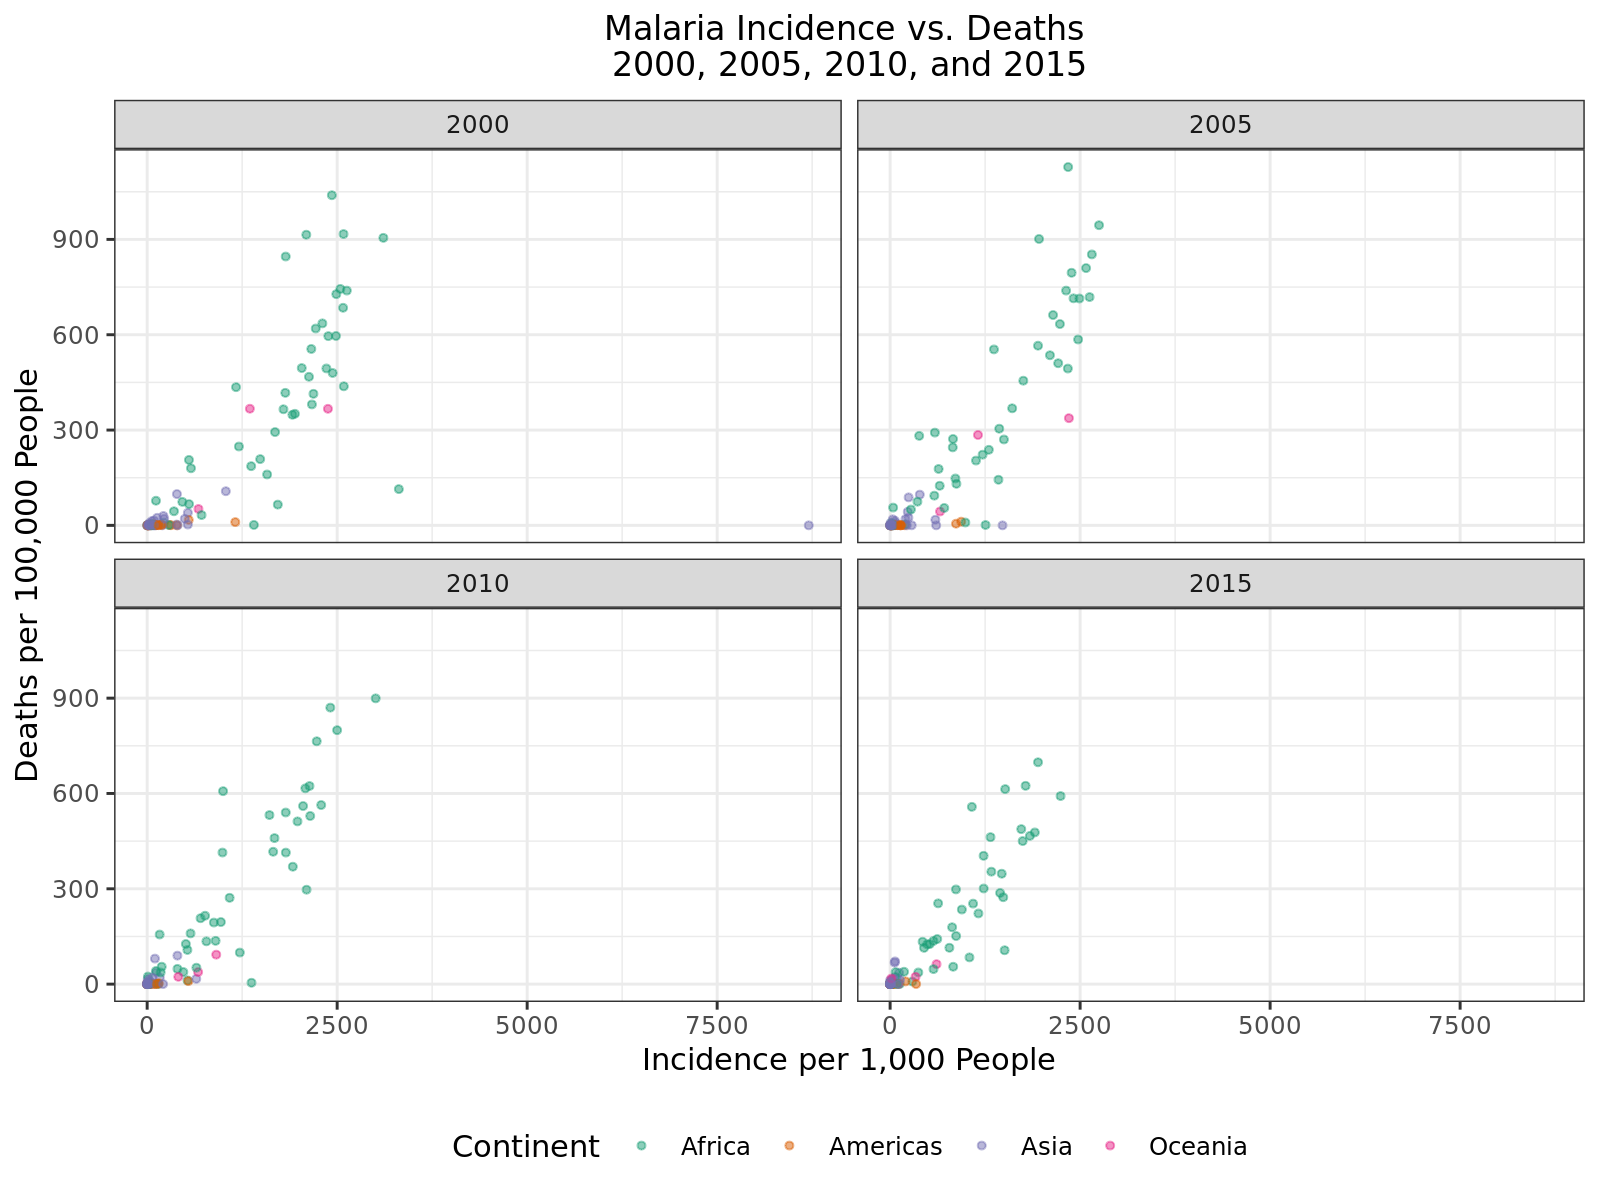

In [276]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)

p = ggplot(malaria_allages, aes(x = incidence_per_1000_allages, y = deaths_per_100000_allages, color = Continent)) +
    geom_point(size = 1, alpha = 0.5) +
    facet_wrap(~Year) +
    labs(title = 'Malaria Incidence vs. Deaths \n2000, 2005, 2010, and 2015',
         x = 'Incidence per 1,000 People',
         y = 'Deaths per 100,000 People') +
    theme_bw() +
    theme(plot.title = element_text(size = 12, hjust = .5),
          legend.position = 'bottom') +
    scale_color_brewer(palette = 'Dark2')

p

In [262]:
malaria_africa <- malaria_allages |>
    filter(Continent == 'Africa')

Since African countries appear to have the highest incidence of malaria and deaths due to malaria, we will focus on data from African countries for the remainder of the project.  First, we will look at deaths due to malaria over time by country.  Then, we will look at the 6 countries with the highest deaths due to malaria during the year 2015.

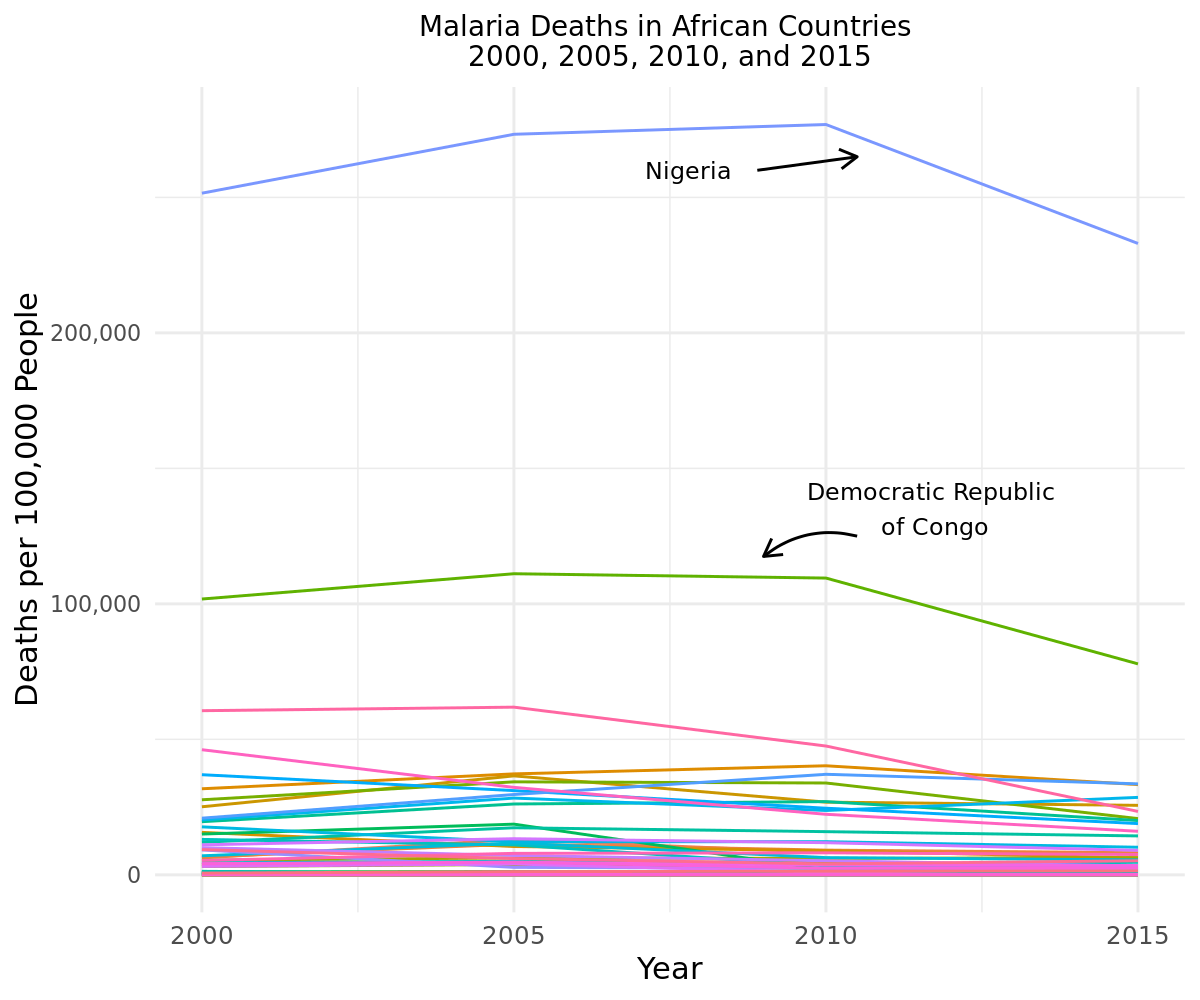

In [289]:
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 200)

p2 = ggplot(malaria_africa, aes(x = Year, y = deaths_allages, group = Country, color = Country)) +
    geom_line() +
    labs(title = 'Malaria Deaths in African Countries \n2000, 2005, 2010, and 2015',
         x = 'Year',
         y = 'Deaths per 100,000 People') +
    scale_y_continuous(labels = scales::comma) +
    theme_minimal() +
    theme(plot.title = element_text(size = 10, hjust= .5),
          axis.text.y = element_text(size = 8),
          legend.position = 'none') +
    annotate('text', x = 2007.8, y = 260000,
    label = 'Nigeria', size = 3) +
    annotate('curve', x = 2008.9, y = 260000,
    yend = 265000, xend = 2010.5, linewidth = .5, curvature = 0,
    arrow = arrow(length = unit(0.25, 'cm'))) +
    annotate('text', x = 2011.75, y = 135000,
    label = 'Democratic Republic \nof Congo', size = 3) +
    annotate('curve', x = 2010.5, y = 125000,
    yend = 117500, xend = 2009, linewidth = .5, curvature = 0.25,
    arrow = arrow(length = unit(0.25, 'cm')))


p2

In [290]:
malaria_africa_2015 <- malaria_allages |>
    ungroup() |>
    filter(Year == '2015' & Continent == 'Africa') |>
    count(Country, wt = deaths_allages) |>
    arrange(desc(n)) |>
    mutate(Country = fct_inorder(Country) |> fct_rev())

malaria_2015 |> head()

top6_countries <- malaria_2015 |>
    slice_max(order_by = n, n = 6) |>
    pull(Country)

Country,n
<fct>,<dbl>
Nigeria,232989.85
Democratic Republic of Congo,77848.68
Niger,33571.04
Burkina Faso,33300.90
Mali,28584.86
Cameroon,25649.26


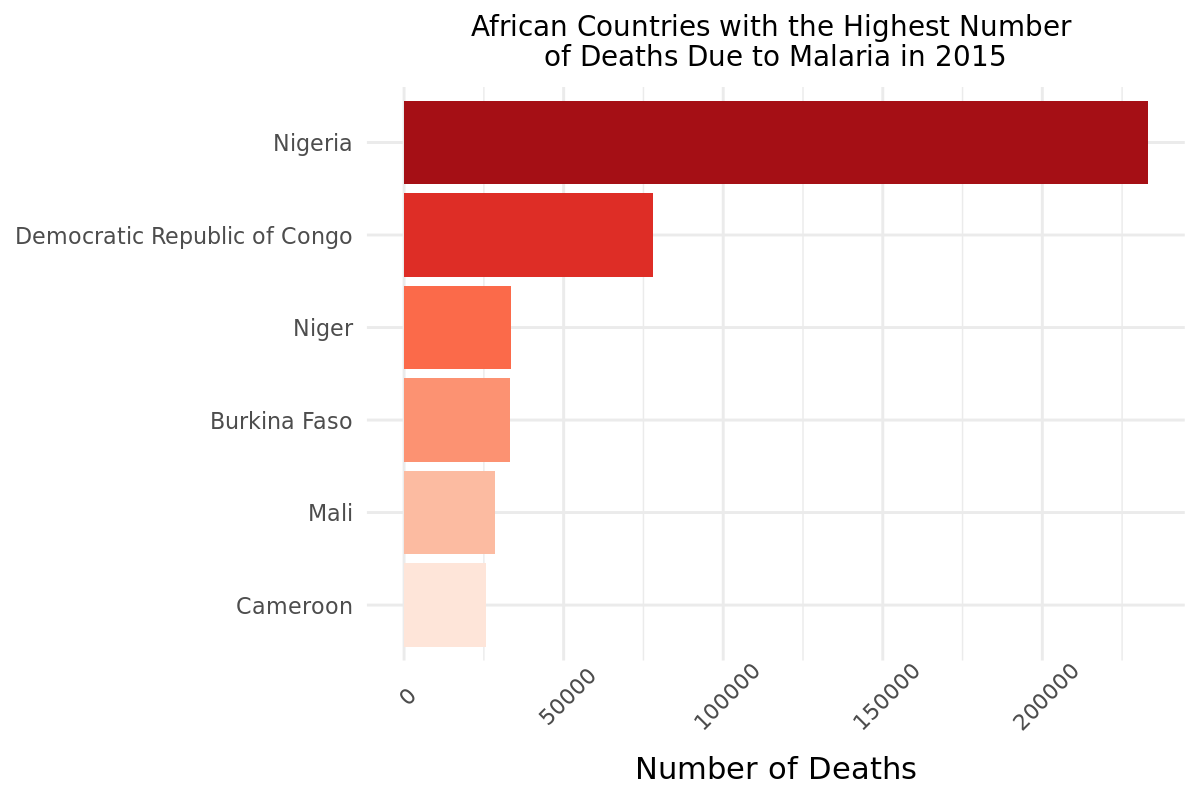

In [281]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)

p3 = ggplot(malaria_2015 |> filter(Country %in% top6_countries), aes(x = n, y = Country, fill = Country)) +
    geom_col() +
    labs(title = 'African Countries with the Highest Number \nof Deaths Due to Malaria in 2015',
         x = 'Number of Deaths',
         y = 'Country') +
    theme_minimal() +
    theme(plot.title = element_text(size=10, hjust=.5),
          axis.title.y = element_blank(),
          axis.text.x = element_text(size = 8, angle = 45, vjust = 0.75),
          axis.text.y = element_text(size =8),
          legend.position = 'none') +
    scale_fill_brewer(palette = 'Reds')

p3